## Only one paper seemed to have data on the KO of modifications

So downloaded the data from: https://www.ebi.ac.uk/ena/browser/view/PRJEB29728?show=reads from paper: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0216709

```

Secondary Study Accession:ERP112076
Study Title:Reading canonical and modified nucleotides in 16S ribosomal RNA using nanopore native RNA sequencing
Center Name:UC SANTA CRUZ
Study Name:UCSC 16S rRNA study
ENA-FIRST-PUBLIC:2018-11-16
ENA-LAST-UPDATE:2018-11-16

The ribosome small subunit is expressed in all living cells. It performs numerous essential functions during translation, including formation of the initiation complex and proofreading of base-pairs between mRNA codons and tRNA anticodons. The core constituent of the small ribosomal subunit is a ~1.5 kb RNA strand in prokaryotes (16S rRNA) and a homologous ~1.8 kb RNA strand in eukaryotes (18S rRNA). Traditional sequencing-by-synthesis (SBS) of rRNA genes or rRNA cDNA copies has achieved wide use as a ‘molecular chronometer’ for phylogenetic studies, and as a tool for identifying infectious organisms in the clinic. However, epigenetic modifications on rRNA are erased by SBS methods. Here we describe direct MinION nanopore sequencing of individual, full-length 16S rRNA absent reverse transcription or amplification. As little as 5 picograms (~10 attomole) of purified E. coli 16S rRNA was detected in 4.5 micrograms of total human RNA. Nanopore ionic current traces that deviated from canonical patterns revealed conserved E. coli 16S rRNA 7-methylguanosine and pseudouridine modifications, and a 7-methylguanosine modification that confers aminoglycoside resistance to some pathological E. coli strains.
```

To align to reference, used reference 16S sequences `ssu_all.tar.gz` from https://data.gtdb.ecogenomic.org/releases/latest/genomic_files_all/ 


In [1]:
from scibacr import *
# Need to remove any 16S sequences < 1200bp from reference otherwise may have issues witn low quality mappings
genome_dir = '../genomes/'
out_c = 0
all_c = 0
rna16s = f'{genome_dir}ssu_all_r207.fna'
with open(f'{genome_dir}ssu_all_r207_gr1400.fna', 'w+') as fout:
    with open(f'{genome_dir}ssu_all_r207.fna', 'r') as fin:
        header_line = None
        for line in fin:
            if line[0] == '>':
                header_line = line
                all_c += 1
            elif len(line) > 1400:
                fout.write(header_line)
                fout.write(line)
                header_line = None
                out_c += 1
print(out_c, all_c, out_c/all_c)            

403739 569538 0.7088886079594338


## Make a GFF file since we can use this later for ELigos2 etc

```
>GB_GCA_008247925.1~CP042184.1 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli [location=3465352..3466889] [ssu_len=1537] [contig_len=3976800]
```

### example gff file

            # gi|696436935|gb|JRIH01000002.1| SGD contig 1 68723 . . . ID=gi|696436935|gb|JRIH01000002.1|
            # gi|696436932|gb|JRIH01000003.1| SGD contig 1 9820 . . . ID=gi|696436932|gb|JRIH01000003.1|

In [2]:
convert_transcriptome_to_gff(f'{genome_dir}ssu_all_r207_gr1400.fna', f'{genome_dir}ssu_all_r207_gr1400.gff')


## Use modrunner to align reads etc 

- Now we run the same process of aligning the reads to the minimap2
- Need to first make a csv which has the info of the data in it
- Since we don't have a genome let's not do the eligos2 thing but could do differr?

In [3]:
import pandas as pd
example_csv = pd.read_csv('../runs/SRR9733842.csv')
example_csv

,Sample_name,fast5_path,basecall_fastq_path,sequence_summary_path,reference_fasta_path,output_folder,gtf_file
0,SRR9733842,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/dat...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/runs/,/media/WorkingSpace/Ariane/output/bacteria/gen...


## Desciphering sample names...


#### 16S rRNA purification
E. coli strain MRE600 16S rRNA was isolated from sucrose-gradient purified 30S subunits. Vibrio cholerae strain A1552 and Methanococcus maripaludis strain S2 16S rRNAs were isolated by gel purification from total RNA. 50–100 μg total RNA (DNase I treated) was heated to 95°C for 3 minutes in 7M urea/1xTE loading buffer and run on a 4% acrylamide/7M urea/TBE gel for 2.5 hours at 28W.


#### Cell culture and total RNA Isolation for 16S rRNA sequencing
E. coli strains BW25113 JW3718Δ and BW25113 JW2171Δ (strains hereafter referred to by gene deletion names RsmGΔ and RsuAΔ, respectively), deficient for 16S rRNA modifying enzymes RsmG and RsuA respectively, were purchased from the Keio Knockout collection [37] (GE Dharmacon). E. coli strains K12 MG1655, RsmGΔ, RsuAΔ and S. enterica strain LT2 were grown in LB media (supplemented with 50 μg/ml kanamycin for RsmGΔ and RsuAΔ) at 37°C to an A600 = 0.8–1.0. 

#### Working out what sen was.. 
To test if full-length MinION 16S rRNA reads gave better classification than short reads, we sequenced purified 16S rRNA from three additional microbes (Methanococcus maripaludis str. S2, Vibrio cholerae str. A1552, and Salmonella enterica str. LT2). These were chosen to give a range of 16S rRNA sequence similarities to E. coli (68.1%, 90.4%, and 97.0% identity respectively). The 16S rRNA adapter sequence was altered slightly for each microbe to accommodate minor sequence differences at the 3′ end (see Methods). We binned reads by length, sampled 10,000 reads per bin for each microorganism, mixed them in silico, and aligned them to 16S rRNA sequences for all four microbes. A read was counted as correctly classified if it aligned to a 16S rRNA reference sequence for the source microorganism. As predicted, the classification accuracy increased with read length from 67.9% for short reads (200–600 bases) to 96.9% for long reads (>1000 bases) (Fig 3A).


In [4]:
# # make a sample file which has the paths for each of them and give each a useful name...
# rsmG = 'BW25113_JW3718-delta' # BL21 strain or K12 MG1655,RsmGΔ, RsuAΔ
# rsmG = 'BW25113_JW2171-delta' # BL21 strain # deficient for 16S rRNA modifying enzymes RsmG and RsuA respectively
# mma = 'Methanococcus maripaludis'
# vch = 'Vibrio cholerae strain A1552'
file_map = {'ERR2902197_01_09_17_R9.4_16S_Ecoli_rsmG_def_albacore_template.fastq': 'KO-RsmG_m7G',
            'ERR2902198_01_18_17_R9.4_Vch_11_21_reRun_albacore_template.fastq': 'WT-Vibrio_cholerae_strain_A1552',
            'ERR2902199_01_30_17_R9.4_16S_Mma_11_22_ReRun_albacore_template.fastq': 'WT-Methanococcus_maripaludis',
            'ERR2902200_02_25_17_R9.4_16S_Ec_Psi516_albacore_template.fastq': 'KO-pseudouridine',
            'ERR2902201_03_09_17_R9.4_16S_Sen_ER_albacore_template.fastq': 'WT-Salmonella_enterica_str._LT2',
            'ERR2902202_03_17_17_R9.4_16S_Ec_albacore_template.fastq': 'WT-K12_MG1655',
            'ERR2902203_03_25_17_R9.4_16S_Ec_RmtB_albacore_template.fastq': 'KO-RmtB_m7G',
            'ERR2902204_03_26_17_R9_4_16S_Ec_BL21_albacore_template.fastq': 'WT-BL21'}

In [5]:
all_runs = pd.DataFrame()
genome_dir = '../genomes'
output_folder = '../ecoli_16s/'
for f in file_map:
    # Want to add in the same fasta file, but refer to the fastq don't need the GFF file
    run_csv = example_csv.copy()
    run_csv['basecall_fastq_path'] = [f'/media/WorkingSpace/Ariane/output/bacteria/16S_ribosomal_RNA/{f}']
    run_csv['reference_fasta_path'] = [f'{genome_dir}ssu_all_r207_gr1400.fna']
    run_csv['gtf_file'] = [f'{genome_dir}ssu_all_r207_gr1400.gff'] # Update this with out new gff de-dup version
    run_csv['output_folder'] = [output_folder]
    run_csv['Sample_name'] = [file_map[f]]
    all_runs = all_runs.append(run_csv)
all_runs.to_csv(f'{output_folder}runs.csv')
all_runs

/tmp/ipykernel_1199033/2049476710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_runs = all_runs.append(run_csv)
/tmp/ipykernel_1199033/2049476710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_runs = all_runs.append(run_csv)
/tmp/ipykernel_1199033/2049476710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_runs = all_runs.append(run_csv)
/tmp/ipykernel_1199033/2049476710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_runs = all_runs.append(run_csv)
/tmp/ipykernel_1199033/2049476710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,Sample_name,fast5_path,basecall_fastq_path,sequence_summary_path,reference_fasta_path,output_folder,gtf_file
0,KO-RsmG_m7G,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,WT-Vibrio_cholerae_strain_A1552,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,WT-Methanococcus_maripaludis,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,KO-pseudouridine,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,WT-Salmonella_enterica_str._LT2,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,WT-K12_MG1655,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,KO-RmtB_m7G,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
0,WT-BL21,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...


In [16]:
# 1. Setup transcriptome and bam files with minimap2
runner = Mapper(f'{output_folder}runs.csv', debug=False, logging_file=f'{output_folder}logfile.txt')
runner.fasta_to_bam(genome=True, mapping_tool='minimap2')

[M::mm_idx_gen::13.967*1.83] collected minimizers
[M::mm_idx_gen::15.049*2.89] sorted minimizers
[M::main::15.105*2.89] loaded/built the index for 403739 target sequence(s)
[M::mm_mapopt_update::15.143*2.88] mid_occ = 121483
[M::mm_idx_stat] kmer size: 14; skip: 5; is_hpc: 0; #seq: 403739
[M::mm_idx_stat::15.173*2.88] distinct minimizers: 1519768 (43.95% are singletons); average occurrences: 136.784; average spacing: 2.975; total length: 618500957
[M::worker_pipeline::296.463*18.92] mapped 14172 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -ax splice -uf -k14 -t 20 /media/WorkingSpace/Ariane/output/bacteria/genomes/ssu_all_r207_gr1400.fna /media/WorkingSpace/Ariane/output/bacteria/16S_ribosomal_RNA/ERR2902197_01_09_17_R9.4_16S_Ecoli_rsmG_def_albacore_template.fastq
[M::main] Real time: 296.663 sec; CPU: 5609.583 sec; Peak RSS: 20.922 GB
[M::mm_idx_gen::13.958*1.83] collected minimizers
[M::mm_idx_gen::15.028*2.87] sorted minimizers
[M::main::15.085*2.87] loaded/built

## Check the bams were good quality

In [22]:
from sciutil import SciUtil
u = SciUtil()
for bam in bams:
    u.dp([bam])
    os.system(f'samtools flagstat {bam}')

--------------------------------------------------------------------------------
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RsmG_m7G_genome.sorted.bam	
--------------------------------------------------------------------------------
48898 + 0 in total (QC-passed reads + QC-failed reads)
34642 + 0 secondary
84 + 0 supplementary
0 + 0 duplicates
41805 + 0 mapped (85.49% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
--------------------------------------------------------------------------------
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-pseudouridine_genome.sorted.bam	
--------------------------------------------------------------------------------
134764 + 0 in total (QC-passed reads + QC-failed reads)
85921 + 0 secondary
182 + 0 supplementary
0 + 0 duplicates
1

## Run eligos2

In [2]:
import os
genome_dir = '../genomes'
output_folder = '../ecoli_16s/'
runs = os.listdir(output_folder)
bams = [f'{output_folder}{run}' for run in runs if '.bai' not in run and '_genome.sorted' in run and 'bam' in run]
bams

['../ecoli_16s/KO-RsmG_m7G_genome.sorted.bam',
 '../ecoli_16s/KO-pseudouridine_genome.sorted.bam',
 '../ecoli_16s/WT-BL21_genome.sorted.bam',
 '../ecoli_16s/KO-RmtB_m7G_genome.sorted.bam',
 '../ecoli_16s/WT-K12_MG1655_genome.sorted.bam',
 '../ecoli_16s/WT-Vibrio_cholerae_strain_A1552_genome.sorted.bam',
 '../ecoli_16s/WT-Methanococcus_maripaludis_genome.sorted.bam',
 '../ecoli_16s/WT-Salmonella_enterica_str._LT2_genome.sorted.bam']

In [5]:
import pandas as pd
run_df = pd.read_csv(f'{output_folder}runs.csv')
run_df

,Unnamed: 0,Sample_name,fast5_path,basecall_fastq_path,sequence_summary_path,reference_fasta_path,output_folder,gtf_file
0,0,KO-RsmG_m7G,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
1,0,WT-Vibrio_cholerae_strain_A1552,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
2,0,WT-Methanococcus_maripaludis,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
3,0,KO-pseudouridine,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
4,0,WT-Salmonella_enterica_str._LT2,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
5,0,WT-K12_MG1655,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
6,0,KO-RmtB_m7G,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...
7,0,WT-BL21,/media/ArchivedDatasets/RNAMOD/data/e_coli/EC_...,/media/WorkingSpace/Ariane/output/bacteria/16S...,/media/WorkingSpace/Share/RNAMOD/ecoli/WT/sequ...,/media/WorkingSpace/Ariane/output/bacteria/gen...,/media/WorkingSpace/Ariane/output/bacteria/eco...,/media/WorkingSpace/Ariane/output/bacteria/gen...


In [8]:
import sys
import os
sys.path.append('/media/WorkingSpace/Ariane/output/rnamod/TomboRunner/')
sys.path.append('/media/WorkingSpace/Ariane/output/rnamod/TomboRunner/ModRunner/')                            
import pandas as pd
runs = ['SRR12090429', 'SRR12090433', 'SRR12090427', 'SRR12090428'] #,
debug = False
threads = 20
from ModRunner import EligosRunner, Minimap2Runner

runner = Minimap2Runner(data_file, debug=debug, logging_file=logfile)
runner.gff_to_bed(filter_value=None)
    
data_file = f'{output_folder}runs.csv'
runs = run_df['Sample_name'].values
for run in ['WT-K12_MG1655', 'WT-BL21']:
    logfile = f'{output_folder}{run}_eligos2_logfile.txt'
    
    
    runner = EligosRunner(data_file, debug=debug, logging_file=logfile)
    runner.test_against_model(run)
    print(run)

Eligos2 sample against model:  WT-K12_MG1655  vs m6A model


CalledProcessError: Command '['/media/ArchivedDatasets/RNAMOD/scripts/eligos2/./eligos2', 'rna_mod', '-t', '40', '-i', '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-K12_MG1655_genome.sorted.bam', '-ref', '/media/WorkingSpace/Ariane/output/bacteria/genomes/ssu_all_r207_gr1400.fna', '-p', '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s//eligos2_WT-K12_MG1655_vs_m6A.txt', '-reg', '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-K12_MG1655.bed', '-o', '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/']' returned non-zero exit status 1.

## Count genes in each experiment

In [17]:
gff = f'{genome_dir}ssu_all_r207_gr1400.gff'
gtf_data = pd.read_csv(gff, sep='\t', header=None)
gtf_data

,0,1,2,3,4,5,6,7,8
0,GB_GCA_008247925.1~CP042184.1,FA,gene,1,1535,.,.,.,GB_GCA_008247925.1~CP042184.1;d__Bacteria;p__P...
1,GB_GCA_008247925.1~CP042184.1-#2,FA,gene,1,1536,.,.,.,GB_GCA_008247925.1~CP042184.1-#2;d__Bacteria;p...
2,GB_GCA_008247925.1~CP042184.1-#3,FA,gene,1,1536,.,.,.,GB_GCA_008247925.1~CP042184.1-#3;d__Bacteria;p...
3,GB_GCA_008247925.1~CP042184.1-#4,FA,gene,1,1535,.,.,.,GB_GCA_008247925.1~CP042184.1-#4;d__Bacteria;p...
4,GB_GCA_008247925.1~CP042184.1-#5,FA,gene,1,1535,.,.,.,GB_GCA_008247925.1~CP042184.1-#5;d__Bacteria;p...
...,...,...,...,...,...,...,...,...,...
403733,RS_GCF_007830295.1~NZ_VLKC01000002.1,FA,gene,1,1584,.,.,.,RS_GCF_007830295.1~NZ_VLKC01000002.1;d__Bacter...
403734,RS_GCF_012044895.1~NZ_CP050695.1,FA,gene,1,1533,.,.,.,RS_GCF_012044895.1~NZ_CP050695.1;d__Bacteria;p...
403735,RS_GCF_000017565.1~NC_009719.1,FA,gene,1,1480,.,.,.,RS_GCF_000017565.1~NC_009719.1;d__Bacteria;p__...
403736,RS_GCF_002836255.1~NZ_PJAU01000004.1,FA,gene,1,1539,.,.,.,RS_GCF_002836255.1~NZ_PJAU01000004.1;d__Bacter...


In [26]:
import os
runs = os.listdir(output_folder)
bams = [f'{output_folder}{run}' for run in runs if '.bai' not in run and '_genome.sorted' in run and 'bam' in run]
gtf = f'{genome_dir}ssu_all_r207_gr1400.gff'
count_df = count_reads_meta(bams, gtf, transcriptome=False)
count_df

/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RsmG_m7G_genome.sorted.bam 61 5456 0.9889432662678992
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-pseudouridine_genome.sorted.bam 135 13748 0.990275876971836
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-BL21_genome.sorted.bam 402 49149 0.9918871465762548
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RmtB_m7G_genome.sorted.bam 424 28241 0.9852084423512995
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-K12_MG1655_genome.sorted.bam 150 167601 0.9991058175510131
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Vibrio_cholerae_strain_A1552_genome.sorted.bam 120 70715 0.9983059222135949
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Methanococcus_maripaludis_genome.sorted.bam 33 58453 0.999435762404678
/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Salmonella_enterica_str._LT2_genome.sorted.bam 325 56102 0.9942403459336843


,gene_name,id,KO-RsmG_m7G_genome,KO-pseudouridine_genome,WT-BL21_genome,KO-RmtB_m7G_genome,WT-K12_MG1655_genome,WT-Vibrio_cholerae_strain_A1552_genome,WT-Methanococcus_maripaludis_genome,WT-Salmonella_enterica_str
0,GB_GCA_008247925.1~CP042184.1;d__Bacteria;p__P...,GB_GCA_008247925.1~CP042184.1,0,0,0,0,0,0,0,0
1,GB_GCA_008247925.1~CP042184.1-#2;d__Bacteria;p...,GB_GCA_008247925.1~CP042184.1-#2,0,0,0,0,0,0,0,0
2,GB_GCA_008247925.1~CP042184.1-#3;d__Bacteria;p...,GB_GCA_008247925.1~CP042184.1-#3,0,0,0,0,0,0,0,0
3,GB_GCA_008247925.1~CP042184.1-#4;d__Bacteria;p...,GB_GCA_008247925.1~CP042184.1-#4,0,0,0,0,0,0,0,0
4,GB_GCA_008247925.1~CP042184.1-#5;d__Bacteria;p...,GB_GCA_008247925.1~CP042184.1-#5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
403733,RS_GCF_007830295.1~NZ_VLKC01000002.1;d__Bacter...,RS_GCF_007830295.1~NZ_VLKC01000002.1,0,0,0,0,0,0,0,0
403734,RS_GCF_012044895.1~NZ_CP050695.1;d__Bacteria;p...,RS_GCF_012044895.1~NZ_CP050695.1,0,0,0,0,0,0,0,0
403735,RS_GCF_000017565.1~NC_009719.1;d__Bacteria;p__...,RS_GCF_000017565.1~NC_009719.1,0,0,0,0,0,0,0,0
403736,RS_GCF_002836255.1~NZ_PJAU01000004.1;d__Bacter...,RS_GCF_002836255.1~NZ_PJAU01000004.1,0,0,0,0,0,0,0,0


/opt/miniconda/miniconda3/envs/ariane_bac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.99735e+05, 1.48200e+03, 7.33000e+02, 5.21000e+02, 3.67000e+02,
        2.56000e+02, 1.98000e+02, 1.56000e+02, 9.00000e+01, 7.40000e+01,
        4.80000e+01, 3.00000e+01, 2.00000e+01, 1.10000e+01, 9.00000e+00,
        4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.        ,  0.61403491,  1.22806983,  1.84210474,  2.45613966,
         3.07017457,  3.68420949,  4.2982444 ,  4.91227931,  5.52631423,
         6.14034914,  6.75438406,  7.36841897,  7.98245389,  8.5964888 ,
         9.21052371,  9.82455863, 10.43859354, 11.05262846, 11.66666337,
        12.28069829]),
 <BarContainer object of 20 artists>)

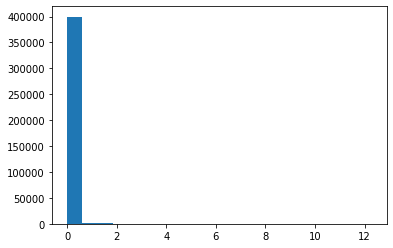

In [27]:
import matplotlib.pyplot as plt

mean_counts = np.mean(count_df[[c for c in count_df.columns if c != 'gene']], axis=1)
plt.hist(np.log2(mean_counts + 1), bins=20)

In [35]:
count_df_nn = count_df[mean_counts > 1]
count_df_nn['species'] = ['-'.join(g.split('-')[-1].split(';')[-5:-3]) for g in count_df_nn['gene_name'].values]
# Drop any genes that didn't have any counts then save
count_df_nn.to_csv(f'{output_folder}counts.csv', index=False)
count_df_nn['species'].value_counts()

/tmp/ipykernel_1199033/3945000057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_df_nn['species'] = ['-'.join(g.split('-')[-1].split(';')[-5:-3]) for g in count_df_nn['gene_name'].values]


s__Escherichia-coli             1889
s__Salmonella-enterica           451
s__Vibrio-cholerae               288
s__Klebsiella-pneumoniae          28
s__Methanococcus-maripaludis      25
                                ... 
s__Edwardsiella-tarda              1
s__Pantoea-vagans                  1
s__Citrobacter-freundii            1
s__Serratia-symbiotica             1
s__Wolbachia-sp013096535           1
Name: species, Length: 77, dtype: int64

In [42]:
cols = [c for c in count_df.columns if c not in ['gene_name', 'id', 'WT-Methanococcus_maripaludis_genome', 'WT-Salmonella_enterica_str', 'WT-Vibrio_cholerae_strain_A1552_genome']]
mean_counts = np.mean(count_df[cols], axis=1)
count_df_nn = count_df[mean_counts > 5]
count_df_nn['species'] = ['-'.join(g.split('-')[-1].split(';')[-5:-3]) for g in count_df_nn['gene_name'].values]
count_df.to_csv(f'{output_folder}counts_abundent.csv', index=False)
count_df_nn['species'].value_counts() # This looks correct :) 

/tmp/ipykernel_1199033/351440010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_df_nn['species'] = ['-'.join(g.split('-')[-1].split(';')[-5:-3]) for g in count_df_nn['gene_name'].values]


s__Escherichia-coli             1014
s__Salmonella-enterica            16
s__Escherichia-fergusonii         10
s__Citrobacter_B-koseri            3
s__Enterobacter-hormaechei_A       2
s__Salmonella-arizonae             2
s__Kosakonia-sp002886105           2
s__Staphylococcus-aureus           1
s__Yersinia-enterocolitica         1
s__Enterobacter-cloacae            1
s__Escherichia-albertii            1
s__Escherichia-sp005843885         1
s__Escherichia-ruysiae             1
s__Pluralibacter-gergoviae         1
s__Klebsiella-indica               1
s__Pantoea-persica                 1
Name: species, dtype: int64

## Build control set...

Here we want to be able to work out what the differences are of the reads... 

One way to do that is to build a control set of genes that have mappings in the comparisons


### pseudouridine KO should show a diff at position 516 

(a) Comparison of aligned reads from strands containing putative pseudouridine versus strands bearing canonical uridine at position 516. Reads are aligned to the E. coli MRE600 rrnD 16S rRNA reference sequence. Shown are twenty-five 16S rRNA reads from separate sequencing runs for E. coli str. MRE600 (wild type), which bears a pseudouridine at U516 (Ψ516) and an RsuA deficient strain (RsuAΔ mutant), which has a canonical U at position 516. Green shading indicates the position of U516 (shown as a T in the reference gene sequence). (b) Aligned ionic current traces from approximately thirty 16S rRNA reads covering position U516 from wild-type E. coli and RsuAΔ mutan strain. Pseudouridylation site, U516, is shown in large font. The sequence is shown 3′-to-5′ because ionic current signal is 3′-to-5′. Numbering uses standard E. coli 16S rRNA numbering.

### m7G

S4 Fig. Confirmation of guanosine N7-methylation (m7G) at positions 527 and 1405 in E. coli 16S rRNA.
(a) Canonical m7G527 is present in wild-type E. coli and absent in the RsmG deficient E. coli strain. Sodium borohydride/aniline cleavage was used to assess the presence or absence of m7G527 in 16S rRNA from wild-type E. coli str. MRE600 or RsmG deficient (mutant) E. coli str. BW25113 JW3718Δ. Sequencing lanes 1–4 are labeled for A, C, G, and U of the RNA sequence. The respective lanes are reactions containing the complementary ddNTP to the RNA sequence. Wild-type 16S rRNA from E. coli str. MRE600 is used as the template. Lanes 6 and 8: sodium borohydride/aniline treatment (labeled +) of 16S rRNA from wild type E. coli and 16S rRNA from RsmG mutant E. coli, respectively. Strand cleavage, which is dependent on the presence of m7G, should result in an primer extension stop at C528, 1-nt preceding G527 (position 527 is marked by an asterisk). Lane 5 and 7: untreated 16S rRNA for wild type and mutant 16S rRNA. Primer extension products were run on denaturing 6% acrylamide gel, and imaged using a phosphorimager. A spontaneous RT stop appears at m7G527 in all lanes where wild-type 16S rRNA was used as the template, which has been observed previously. (b) RmtB confers a kanamycin resistance phenotype consistent with G1405 N7-methylation in 16S rRNA from an engineered E. coli strain. Serial dilutions from 10−2 to 10−6 (Left to Right) of E. coli BL21 DE3 pLysS strains transformed with pLM1-RmtB and negative control pLM1-RmtBΔ were spotted on LB agar plates. The pLM1 plasmids use pET32a as the backbone, which contains an ampicillin resistance gene. The RmtB gene is under the control of a lactose inducible T7 promoter. Plates are supplemented with: 100 μg/ml Ampicillin (top), 100 μg/ml Ampicillin + 200 μg/ml Kanamycin + 1% glucose (middle), 100 μg/ml Ampicillin + 200 μg/ml Kanamycin + 1 mM IPTG (bottom). Apparent leaky expression of the pLM-RmtB vector leads to some cell survival, even under non-inducing conditions and in the presence of glucose. RmtB is known to confer high-level resistance to kanamycin.


https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0216709#sec017


In [48]:
read_dict = gen_mapping_gene_read_dict_meta(bam, gff)

In [55]:
ecoli_columns = ['KO-RsmG_m7G_genome', 
                 'KO-pseudouridine_genome', 
                 'WT-BL21_genome', 
                 'KO-RmtB_m7G_genome',
                 'WT-K12_MG1655_genome']
ecoli_df = count_df_nn[['id', 'species'] + ecoli_columns]

min_counts = np.min(ecoli_df[ecoli_columns].values, axis=1)
# Get the genes that had at least 30 counts in each...
ecoli_df = ecoli_df[min_counts > 30]
# positions = 527, 1405, 516 (516 is psi)
ecoli_df
gene_location = 'GB_GCA_014170915.1~CP059988.1-#2' # psi is at 512.
ref = pysam.FastaFile(f'{genome_dir}ssu_all_r207_gr1400.fna')
for bam in bams:
    samfile = pysam.AlignmentFile(f'{bam}', "rb")
    write_msa_over_gene(gene_location, samfile, ref, f'{output_folder}msas/{bam.split("/")[-1].split(".")[0]}.msa',
                        read_dict=read_dict)
    samfile.close()

In [44]:
ecoli_df

,id,species,KO-RsmG_m7G_genome,KO-pseudouridine_genome,WT-BL21_genome,KO-RmtB_m7G_genome,WT-K12_MG1655_genome
4598,GB_GCA_014170915.1~CP059988.1-#2,s__Escherichia-coli,45,130,268,175,1994
8865,GB_GCA_000220805.2~AFST01000007.2,s__Escherichia-coli,32,85,121,77,915
9355,GB_GCA_900449145.1~UGCP01000002.1-#7,s__Escherichia-coli,41,99,699,469,460
9676,RS_GCF_000281775.1~NZ_AFEX01000007.1,s__Escherichia-coli,33,68,60,56,539
13177,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,s__Escherichia-coli,32,76,44,50,541
13816,RS_GCF_000953515.1~NZ_LM993812.1-#7,s__Escherichia-coli,33,94,242,86,689
16199,GB_GCA_900660275.1~CAACVN010000051.1,s__Escherichia-coli,63,111,333,185,1775
16200,GB_GCA_900660275.1~CAACVN010000052.1,s__Escherichia-coli,75,158,754,396,3694
16201,GB_GCA_900660275.1~CAACVN010000056.1,s__Escherichia-coli,39,88,420,190,1805
16202,GB_GCA_900660275.1~CAACVN010000010.1,s__Escherichia-coli,39,102,298,154,1139


## Now we want to test training

For this, we need to extract the reads from the genes following the ecoli df.


In [56]:
ecoli_df.to_csv(f'{output_folder}ecoli.csv', index=False)

In [57]:
fasta = '../genomes/ssu_all_r207_gr1400.fna'

In [59]:
for bam in bams:
    print(bam)
    read_dict = gen_mapping_gene_read_dict_meta(bam, gtf)
    output_name = f'{output_folder}training/{bam.split("/")[-1].split(".")[0]}.h5'
    gen_training_h5py_position(bam, fasta, read_dict,
                                   output_filename=output_name,
                                   min_coverage=20, max_coverage=100)

/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RsmG_m7G_genome.sorted.bam


100%|█| 1373/1373 [00:03<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-pseudouridine_genome.sorted.bam


100%|█| 2180/2180 [00:10<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-BL21_genome.sorted.bam


100%|█| 3648/3648 [00:34<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RmtB_m7G_genome.sorted.bam


100%|█| 3035/3035 [00:21<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-K12_MG1655_genome.sorted.bam


100%|█| 4799/4799 [01:45<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Vibrio_cholerae_strain_A1552_genome.sorted.bam


100%|█| 2171/2171 [00:35<00:


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Methanococcus_maripaludis_genome.sorted.bam


100%|█| 71/71 [00:49<00:00, 


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-Salmonella_enterica_str._LT2_genome.sorted.bam


100%|█| 3615/3615 [00:33<00:


In [62]:
genes = [g for g in ecoli_df['id'].values]
genes

['GB_GCA_014170915.1~CP059988.1-#2',
 'GB_GCA_000220805.2~AFST01000007.2',
 'GB_GCA_900449145.1~UGCP01000002.1-#7',
 'RS_GCF_000281775.1~NZ_AFEX01000007.1',
 'RS_GCF_900448705.1~NZ_UGAY01000002.1-#7',
 'RS_GCF_000953515.1~NZ_LM993812.1-#7',
 'GB_GCA_900660275.1~CAACVN010000051.1',
 'GB_GCA_900660275.1~CAACVN010000052.1',
 'GB_GCA_900660275.1~CAACVN010000056.1',
 'GB_GCA_900660275.1~CAACVN010000010.1',
 'GB_GCA_900660275.1~CAACVN010000058.1',
 'GB_GCA_013421645.1~WVHZ01000001.1',
 'RS_GCF_008824125.1~NZ_CP044410.1-#8',
 'GB_GCA_009889725.1~JRKZ01000001.1-#5',
 'GB_GCA_900450065.1~UGED01000003.1',
 'GB_GCA_900660265.1~CAACVK010000053.1',
 'GB_GCA_900660265.1~CAACVK010000060.1',
 'GB_GCA_900660265.1~CAACVK010000055.1',
 'GB_GCA_900660265.1~CAACVK010000051.1',
 'GB_GCA_900660265.1~CAACVK010000056.1',
 'RS_GCF_003956465.1~NZ_CP025892.1-#8']

## Create a training dataset from one sample

In [65]:
training_run = f'{output_folder}training/WT-BL21_genome.h5'
kmer_len = 5
training_df = create_train_chunked_set([training_run], kmer_len)
training_df

,Run,Gene,ID,Start,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,/media/WorkingSpace/Ariane/output/bacteria/eco...,GB_GCA_000188795.2~ADUU01000121.1,3,15,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,32.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,/media/WorkingSpace/Ariane/output/bacteria/eco...,GB_GCA_000188795.2~ADUU01000121.1,4,20,28.0,0.0,46.0,0.0,0.0,0.0,...,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/media/WorkingSpace/Ariane/output/bacteria/eco...,GB_GCA_000188795.2~ADUU01000121.1,5,25,0.0,26.0,29.0,0.0,NaN,0.0,...,33.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,21.0,NaN
3,/media/WorkingSpace/Ariane/output/bacteria/eco...,GB_GCA_000188795.2~ADUU01000121.1,6,30,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,0.0,4.0
4,/media/WorkingSpace/Ariane/output/bacteria/eco...,GB_GCA_000188795.2~ADUU01000121.1,7,35,0.0,NaN,NaN,NaN,0.0,0.0,...,7.0,NaN,NaN,NaN,15.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848757,/media/WorkingSpace/Ariane/output/bacteria/eco...,RS_GCF_904831825.1~NZ_LR882997.1-#7,224,1120,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.0,0.0,0.0,0.0,25.0,24.0,0.0,0.0
848758,/media/WorkingSpace/Ariane/output/bacteria/eco...,RS_GCF_904831825.1~NZ_LR882997.1-#7,225,1125,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,14.0,0.0
848759,/media/WorkingSpace/Ariane/output/bacteria/eco...,RS_GCF_904831825.1~NZ_LR882997.1-#7,226,1130,0.0,3.0,0.0,2.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0
848760,/media/WorkingSpace/Ariane/output/bacteria/eco...,RS_GCF_904831825.1~NZ_LR882997.1-#7,227,1135,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,11.0,0.0,0.0,7.0,0.0,0.0,1.0


## Get k-mers across the 16s genes

We want to do a sliding window to have a look at the kmers across a gene.

This will allow us to actually do the searchy thing properly and see if the tails of the distributions enable the identification of the modifications in KO.

In [66]:
gen_kmer_sliding_window_ref(fasta, 5, f'{output_folder}kmer_5_bac.h5', genes)

In [72]:
from collections import defaultdict
kmer_counts = defaultdict(int)
kmer_h5 = h5py.File(f'{output_folder}kmer_5_bac.h5', 'r')
for kmer in kmer_h5:
    kmer_data = kmer_h5[kmer]
    for k in kmer_data.keys():
        #for position in kmer_data[k]:
        kmer_counts[kmer] += 1
kmer_h5.close()

In [73]:
dict(sorted(kmer_counts.items(), key=lambda item: item[1], reverse=True))

{'AAACT': 21,
 'AAAGG': 21,
 'AAAGT': 21,
 'AACAA': 21,
 'AACAC': 21,
 'AACCG': 21,
 'AACCT': 21,
 'AACGC': 21,
 'AACTC': 21,
 'AAGAC': 21,
 'AAGAG': 21,
 'AAGCC': 21,
 'AAGCG': 21,
 'AAGCT': 21,
 'AAGGA': 21,
 'AAGGC': 21,
 'AAGGG': 21,
 'AAGGT': 21,
 'AAGTA': 21,
 'AAGTC': 21,
 'AAGTG': 21,
 'AATAT': 21,
 'AATCC': 21,
 'AATGA': 21,
 'AATTA': 21,
 'AATTC': 21,
 'ACAAG': 21,
 'ACACC': 21,
 'ACACG': 21,
 'ACATC': 21,
 'ACATG': 21,
 'ACCAC': 21,
 'ACCAG': 21,
 'ACCCG': 21,
 'ACCCT': 21,
 'ACCGC': 21,
 'ACCGG': 21,
 'ACCGT': 21,
 'ACCTC': 21,
 'ACCTG': 21,
 'ACCTT': 21,
 'ACGAC': 21,
 'ACGAG': 21,
 'ACGAT': 21,
 'ACGCA': 21,
 'ACGCC': 21,
 'ACGCG': 21,
 'ACGCT': 21,
 'ACGGA': 21,
 'ACGGC': 21,
 'ACGGG': 21,
 'ACGGT': 21,
 'ACGTC': 21,
 'ACGTG': 21,
 'ACGTT': 21,
 'ACTAC': 21,
 'ACTCA': 21,
 'ACTCC': 21,
 'ACTCG': 21,
 'ACTGC': 21,
 'ACTGG': 21,
 'ACTTG': 21,
 'ACTTT': 21,
 'AGACA': 21,
 'AGACC': 21,
 'AGACT': 21,
 'AGAGG': 21,
 'AGATC': 21,
 'AGATG': 21,
 'AGCAA': 21,
 'AGCAC': 21,
 'AGCC

In [75]:
bams[0:5]

['/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RsmG_m7G_genome.sorted.bam',
 '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-pseudouridine_genome.sorted.bam',
 '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-BL21_genome.sorted.bam',
 '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/KO-RmtB_m7G_genome.sorted.bam',
 '/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/WT-K12_MG1655_genome.sorted.bam']

In [81]:
training_runs = [f'{output_folder}training/{bam.split("/")[-1].split(".")[0]}.h5' for bam in bams[0:5]] 

100%|█████████████████████████████████████████████| 21/21 [00:10<00:00,  1.94it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RsmG_m7G_genome.h5 1649


100%|█████████████████████████████████████████████| 21/21 [00:18<00:00,  1.14it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-pseudouridine_genome.h5 4584


100%|█████████████████████████████████████████████| 21/21 [00:18<00:00,  1.15it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-BL21_genome.h5 7509


100%|█████████████████████████████████████████████| 21/21 [00:18<00:00,  1.12it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RmtB_m7G_genome.h5 10381


100%|█████████████████████████████████████████████| 21/21 [00:20<00:00,  1.03it/s]

/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-K12_MG1655_genome.h5 13612


In [82]:
kmers_large = df['kmer'].value_counts()[df['kmer'].value_counts() > 100]

In [83]:
kmers_large

CGTGC    6366
CGCGC    2695
C--GC     917
          444
CGTG-     218
CG-GC     213
TGTGC     205
CGT--     203
---GC     149
CGTGT     120
CATGC     117
CGCG-     117
CGGGC     109
CG---     106
--TGC     106
-GTGC     106
---AC     106
CGCGT     103
Name: kmer, dtype: int64

In [84]:
wt = df[df['Run'] == 'WT-K12_MG1655_genome']
psi = df[df['Run'] == 'KO-pseudouridine_genome']
psi['kmer'].value_counts()

CGTGC    1937
CGCGC     161
C--GC      91
           74
CGT--      57
         ... 
GCACC       1
CTTGT       1
AACGC       1
CAT-T       1
--TAC       1
Name: kmer, Length: 106, dtype: int64

## Create conv VAE to find positions

In [86]:
training_df.to_csv(f'{output_folder}training_data.csv', index=False)
# Now we need to replcae the deletions, let's replace with 0 for now, sometimes I do mean...
training_df = training_df.replace(np.nan, 0) # 

test_data = training_df.values[:, 4:]
test_data = test_data / np.max(test_data)
test_data = np.array(test_data).astype(float)
test_labels = training_df[: 1]

In [89]:
from scivae import ConvVAE
config = {'scale_data': False,
         'input_size': (4, kmer_len),
          'batch_norm': True,
         'loss': {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 0.1},
          'encoding': {'layers': [{'filters': 32, 'kernel_size': 4, 'pooling': 2, 'strides': 1, 'padding':'same',
                                  'activation_fn': 'relu'},
                                  ]},
          'decoding': {'layers': [
                                  {'filters': 32, 'kernel_size': 4, 'pooling': 2, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'relu'},
                                  {'filters': 1, 'kernel_size': 4, 'pooling': 2, 'strides': 1, 'padding':'same',
                                  'activation_fn': 'sigmoid'}
                                  ]},
          'latent': {'num_nodes': 1},
          'optimiser': {'params': {'learning_rate': 0.01}, 'name': 'adam'}
}

test_data = np.array([d.reshape((4, kmer_len, 1)) for d in test_data])
# Run the VAE 
cvae = ConvVAE(test_data, test_data, test_labels, config, 'cvae')
# The more epochs you run the better (until some point so would recomend more though it wil take longer)
cvae.encode('default', epochs=20, batch_size=100, early_stop=True)
# get the encoded data
seq_encoding = cvae.get_encoded_data()


(4, 5)
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 4, 5, 1)]    0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 4, 5, 32)     544         ['default_input[0][0]']          
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 4, 5, 32)    128         ['conv2d_2[0][0]']               
 rmalization)                           

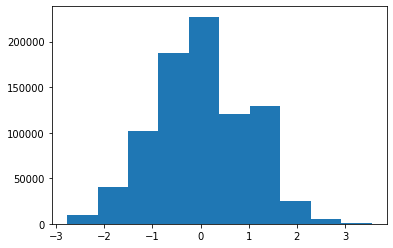

/tmp/ipykernel_1199033/2409545925.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])


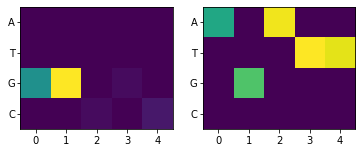

26524/26524 [==============================] - 26s 967us/step


/tmp/ipykernel_1199033/2409545925.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])


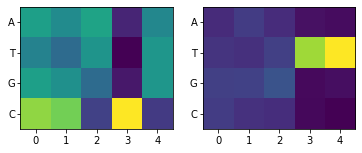

In [90]:
import matplotlib.pyplot as plt
plt.hist(seq_encoding)  # Has a nice normal dist
plt.show()

# Show some of the kmers (4)
n = 2
seqs_encoding = cvae.get_encoded_data()
# Show the true data
plt.figure(figsize=(6, 3))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])
    ax.tick_params(axis='y', which='major', pad=2.0)
    plt.imshow(test_data[i].reshape(4, kmer_len))

plt.show()

# Show the prediction of the test data (i.e. using the test data how does it get reconstructed)

seqs_encoding = cvae.encode_new_data(test_data, scale=False)
# Show the prediction of the test data (i.e. using the test data how does it get reconstructed)
d = cvae.decoder.predict(seqs_encoding)

plt.figure(figsize=(6, 3))
n = 2
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    ax.set_yticklabels(['', 'A', 'T', 'G', 'C'])
    ax.tick_params(axis='y', which='major', pad=2.0)
    plt.imshow(d[i,:].reshape(4, kmer_len))
plt.show()

In [92]:
cvae.save(f'model_weights_{kmer_len}.h5', f'model_optimiser_{kmer_len}.json', f'config_{kmer_len}.json') # looks pretty decent for a single node 

## Use encoding function to probe for variation in the dataset

In [263]:
wt['kmer'].value_counts()

CGTGC    1217
CGCGC     645
C--GC     228
           98
TGTGC      58
         ... 
--AAC       1
C-TG-       1
TGCGC       1
-AAGC       1
CCTGG       1
Name: kmer, Length: 109, dtype: int64

426/426 [==============================] - 1s 1ms/step
         444
CGT--    203
---AC    106
CG---    106
Name: kmer, dtype: int64


CGTGC    1035
CGCGC     151
C--GC     120
CGGGC      94
Name: kmer, dtype: int64

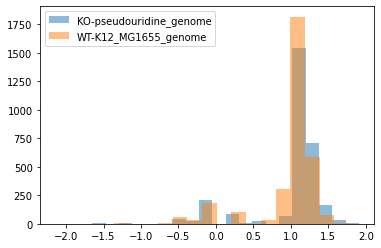

In [103]:
# Get kmer at position
df_psi = df.copy()
# Want the start to be 51-0 
df_psi['Start'].value_counts()
df_psi['Run'].value_counts()
df_psi = df_psi.replace(np.nan, 0)
df_psi

# encode the data
psi_data = df_psi.values[:, 5:]
psi_data = psi_data / np.max(psi_data)
psi_data = np.array(psi_data).astype(float)
psi_data = np.array([d.reshape((4, kmer_len, 1)) for d in psi_data])
seqs_encoding = cvae.encode_new_data(psi_data, scale=False)
df_psi['MeanEncoding'] = seqs_encoding

for run in ['KO-pseudouridine_genome', 'WT-K12_MG1655_genome']: #set(df_psi['Run'].values):
    values = df_psi[df_psi['Run'] == run]
    plt.hist(values['MeanEncoding'].values, label=run, bins=20, alpha=0.5)
    
outlier = df_psi[df_psi['MeanEncoding'] < 0]
plt.legend()
print(outlier['kmer'].value_counts()[:4])

outlier = df_psi[df_psi['MeanEncoding'] > 1.25]
plt.legend()
outlier['kmer'].value_counts()[:4]

In [105]:
outlier['ID'].value_counts()

1218    169
1215    152
507     151
506     149
1217    124
503     104
1224     89
508      74
1220     56
1223     54
956      49
1213     46
504      46
1222     42
1216     41
505      41
509      28
945      27
950      26
951      23
958      13
Name: ID, dtype: int64

## The next logical question is, without knowing this position, would we have identified it?

To do this, we can look only in the WT and check for kmers that are the same (based on the reference) then check for outliers...

In [ ]:
fasta = '/media/WorkingSpace/Ariane/output/bacteria/genomes/ssu_all_r207_gr1400.fna'
kmer_dict_to_position = defaultdict(list)
with open(fasta, 'r') as fin:
    read_next = False
    for line in fin:
        if line[0] == '>':
            if 'GB_GCA_014170915.1~CP059988.1-#2' in line:
                read_next = True
            else:
                read_next = False
        elif read_next:
            print(line)
            for i in range(0, len(line) - kmer_len):
                seq = line[i: i + kmer_len]
                kmer_dict_to_position[seq].append(i)
kmer = 'CACCG' # RSMB # 'GTGCC' # psi #'CCGCG' # m7g kmer
positions = kmer_dict_to_position[kmer]
positions

## Pick some positions to validate from the paper

In [207]:
df_pseudo = get_kmer_encodings('CGTGC',  f'{output_folder}kmer_5_bac.h5', training_runs, 1000)
df_pseudo

100%|█████████████████████████████████████████████| 21/21 [00:09<00:00,  2.12it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RsmG_m7G_genome.h5 1649


100%|█████████████████████████████████████████████| 21/21 [00:17<00:00,  1.19it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-pseudouridine_genome.h5 4584


100%|█████████████████████████████████████████████| 21/21 [00:17<00:00,  1.20it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-BL21_genome.h5 7509


100%|█████████████████████████████████████████████| 21/21 [00:16<00:00,  1.25it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RmtB_m7G_genome.h5 10381


100%|█████████████████████████████████████████████| 21/21 [00:19<00:00,  1.07it/s]

/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-K12_MG1655_genome.h5 13612


,Run,kmer,Gene,ID,Start,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,KO-RsmG_m7G_genome,CGCGC,GB_GCA_000220805.2~AFST01000007.2,508,513,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,0.0,28.0,0.0,28.0,0.0,20.0,0.0,32.0
1,KO-RsmG_m7G_genome,CGTGC,GB_GCA_000220805.2~AFST01000007.2,1220,1225,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,19.0,0.0,2.0,0.0,0.0,0.0,19.0
2,KO-RsmG_m7G_genome,CGCGC,GB_GCA_000220805.2~AFST01000007.2,508,513,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,3.0,0.0,36.0,0.0,11.0,0.0,8.0
3,KO-RsmG_m7G_genome,CGTGC,GB_GCA_000220805.2~AFST01000007.2,1220,1225,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,19.0,0.0,2.0,0.0,0.0,0.0,6.0
4,KO-RsmG_m7G_genome,CGCGC,GB_GCA_000220805.2~AFST01000007.2,508,513,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,0.0,53.0,0.0,11.0,0.0,33.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,WT-K12_MG1655_genome,TGTGC,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,1222,1227,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,13.0
13608,WT-K12_MG1655_genome,CGCGC,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,507,512,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,27.0,0.0,27.0,0.0,25.0,0.0,38.0
13609,WT-K12_MG1655_genome,CG-GC,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,1222,1227,0.0,0.0,NaN,0.0,0.0,...,0.0,14.0,NaN,21.0,0.0,1.0,0.0,NaN,0.0,7.0
13610,WT-K12_MG1655_genome,CGCGC,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,507,512,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,19.0,0.0,36.0,0.0,28.0,0.0,39.0


In [157]:
kmers_large = df['kmer'].value_counts()[df['kmer'].value_counts() > 100]
kmers_large

CGTGC    6366
CGCGC    2695
C--GC     917
          444
CGTG-     218
CG-GC     213
TGTGC     205
CGT--     203
---GC     149
CGTGT     120
CATGC     117
CGCG-     117
CGGGC     109
CG---     106
--TGC     106
-GTGC     106
---AC     106
CGCGT     103
Name: kmer, dtype: int64

426/426 [==============================] - 1s 1ms/step
        p_values         p.adj  t_values  \
1   2.589074e-01  3.236343e-02  2.155226   
30  2.763556e-11  8.868326e-13 -7.398519   
31  2.763556e-11  1.381778e-12 -7.330930   
35  1.666850e-05  1.666850e-06 -4.971812   
36  1.024021e-07  7.680159e-09 -6.098067   

                                             labels  kmer  
1   KO-pseudouridine_genome vs WT-K12_MG1655_genome   950  
30        KO-pseudouridine_genome vs WT-BL21_genome   508  
31  KO-pseudouridine_genome vs WT-K12_MG1655_genome   508  
35        KO-pseudouridine_genome vs WT-BL21_genome   509  
36  KO-pseudouridine_genome vs WT-K12_MG1655_genome   509  


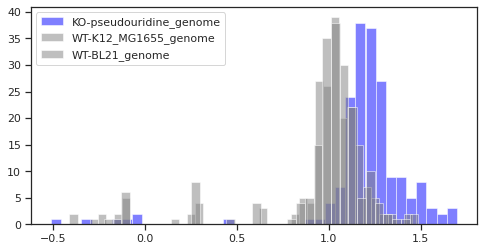

In [300]:
comparisons = [['WT-BL21_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'WT-BL21_genome'],
               ['WT-BL21_genome', 'KO-RmtB_m7G_genome'],
               ['WT-BL21_genome', 'KO-RsmG_m7G_genome']
              ]

p_values = []
t_values = []
labels = []
kmer = []
df_psi = df_pseudo.copy()
    
df_psi.fillna(0, inplace=True)

# encode the data
psi_data = df_psi.values[:, 5:]
psi_data = psi_data / np.max(psi_data)
psi_data = np.array(psi_data).astype(float)
psi_data = np.array([d.reshape((4, kmer_len, 1)) for d in psi_data])
seqs_encoding = cvae.encode_new_data(psi_data, scale=False)
df_psi['MeanEncoding'] = seqs_encoding

for kmer_start in set(df_pseudo['ID'].values):
    df_psi_kmer = df_psi[df_psi['Start'] == kmer_start]
    if len(df_psi_kmer) > 10:
        for comparison in comparisons:
            e_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[0]]['MeanEncoding'].values
            s_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[1]]['MeanEncoding'].values
            t_stat, p_val = stats.ttest_ind(e_plus, s_plus)
            p_values.append(p_val)
            t_values.append(t_stat)
            kmer.append(kmer_start)
            labels.append(f'{comparison[1]} vs {comparison[0]}')
            
# Calculate adjusted p-values
from statsmodels.stats.multitest import multipletests
p_adj = multipletests(p_values, alpha=0.1, method='fdr_bh', returnsorted=False)

kmer_df = pd.DataFrame()
kmer_df['p_values'] = p_adj[1]
kmer_df['p.adj'] = p_values
kmer_df['t_values'] = t_values
kmer_df['labels'] = labels
kmer_df['kmer'] = kmer

# Have a look at if they are occuring in a specific place!
print(kmer_df[kmer_df['p.adj'] < 0.05])


df_508 = df_psi[df_psi['Start'] == 508]
colours = ['blue', 'grey', 'grey']
for i, run in enumerate(['KO-pseudouridine_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome']): #set(df_psi['Run'].values):
    values = df_508[df_508['Run'] == run]
    plt.hist(values['MeanEncoding'].values, label=run, bins=40, alpha=0.5, color=colours[i])
plt.legend()
plt.savefig(f'/media/WorkingSpace/Ariane/output/bacteria/figs/pseudouridine.svg')

In [301]:
from unidip.dip import diptst


seqs_encoding = list(seqs_encoding[:, 0])
seqs_encoding.sort()
intervals = diptst(seqs_encoding)
intervals

(0.03022703165016015, 0.000999000999000999, (4818, 8793))

(array([3.623e+03, 7.710e+02, 3.180e+02, 7.000e+01, 1.900e+01, 7.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00]),
 array([1.1471136, 1.2729181, 1.3987225, 1.5245271, 1.6503315, 1.776136 ,
        1.9019406, 2.027745 , 2.1535494, 2.279354 , 2.4051585],
       dtype=float32),
 <BarContainer object of 10 artists>)

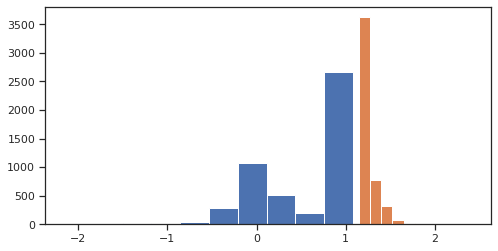

In [302]:
plt.hist(seqs_encoding[:4818])
plt.hist(seqs_encoding[8793:])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

KO-pseudouridine_genome v.s. WT-BL21_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.609e-33 U_stat=2.415e+04
WT-BL21_genome v.s. WT-K12_MG1655_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.412e+04
KO-pseudouridine_genome v.s. WT-K12_MG1655_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.919e-33 U_stat=2.504e+04


<AxesSubplot:>

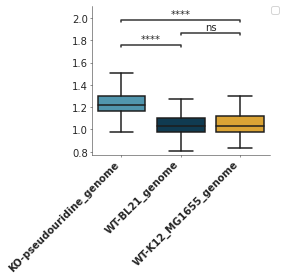

In [255]:
df_508 = df_508[df_508['Run'].isin(['KO-pseudouridine_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome'])]
df_508 = df_508[df_508['kmer'].isin(df_508['kmer'].value_counts()[:3].index)]
bp = Boxplot(df_508, x='Run', y='MeanEncoding', config=opts, 
             add_stats=True)
bp.plot()

In [216]:
print(df_508[df_508['MeanEncoding'] < 1.25]['kmer'].value_counts()[:3])
print(df_508[df_508['MeanEncoding'] < 0.5]['kmer'].value_counts()[:3])
print(df_508[df_508['MeanEncoding'] > 1.25]['kmer'].value_counts()[:3])


CGCGC    479
C--GC    116
CGTGC     97
Name: kmer, dtype: int64
C--GC    16
CGT-C    11
CG---     7
Name: kmer, dtype: int64
CGTGC    61
CGCGC    28
C--GC    10
Name: kmer, dtype: int64


## Do the same for Each of the other modifications

This is from Figure in there m7527 (CCGCG) at 527 mer for RSMG mutant and RmtB (1405) (CCGTC)

In [192]:
df_rmsg = get_kmer_encodings('CCGCG',  f'{output_folder}kmer_5_bac.h5', training_runs, 1000)
df_rmsg

100%|█████████████████████████████████████████████| 21/21 [00:10<00:00,  1.92it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RsmG_m7G_genome.h5 1408


100%|█████████████████████████████████████████████| 21/21 [00:17<00:00,  1.20it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-pseudouridine_genome.h5 3925


100%|█████████████████████████████████████████████| 21/21 [00:17<00:00,  1.21it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-BL21_genome.h5 6365


100%|█████████████████████████████████████████████| 21/21 [00:16<00:00,  1.27it/s]


/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/KO-RmtB_m7G_genome.h5 8741


100%|█████████████████████████████████████████████| 21/21 [00:19<00:00,  1.08it/s]

/media/WorkingSpace/Ariane/output/bacteria/ecoli_16s/training/WT-K12_MG1655_genome.h5 11617


,Run,kmer,Gene,ID,Start,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,KO-RsmG_m7G_genome,CCGCG,GB_GCA_000220805.2~AFST01000007.2,394,399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,0.0,9.0,56.0,25.0,0.0,19.0,0.0
1,KO-RsmG_m7G_genome,CCGCG,GB_GCA_000220805.2~AFST01000007.2,519,524,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,9.0,15.0,21.0,0.0,28.0,0.0
2,KO-RsmG_m7G_genome,CCGCG,GB_GCA_000220805.2~AFST01000007.2,394,399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,0.0,22.0,72.0,58.0,0.0,17.0,0.0
3,KO-RsmG_m7G_genome,CCGCG,GB_GCA_000220805.2~AFST01000007.2,519,524,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,22.0,49.0,25.0,0.0,18.0,0.0
4,KO-RsmG_m7G_genome,CCGCG,GB_GCA_000220805.2~AFST01000007.2,394,399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,0.0,22.0,41.0,25.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11612,WT-K12_MG1655_genome,CCGCG,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,393,398,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,0.0,20.0,57.0,38.0,0.0,10.0,0.0
11613,WT-K12_MG1655_genome,CCCC-,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,518,523,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,23.0,29.0,59.0,27.0,NaN
11614,WT-K12_MG1655_genome,CCCCA,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,518,523,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,31.0,54.0,54.0,28.0,0.0
11615,WT-K12_MG1655_genome,CGGCG,RS_GCF_900448705.1~NZ_UGAY01000002.1-#7,393,398,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,15.0,0.0,9.0,16.0,0.0,0.0,5.0,0.0


In [287]:
comparisons = [['WT-BL21_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'WT-BL21_genome'],
               ['WT-BL21_genome', 'KO-RmtB_m7G_genome'],
               ['WT-BL21_genome', 'KO-RsmG_m7G_genome']
              ]

p_values = []
t_values = []
labels = []
kmer = []
df_psi = df_rmsg.copy()
    
df_psi.fillna(0, inplace=True)

# encode the data
psi_data = df_psi.values[:, 5:]
psi_data = psi_data / np.max(psi_data)
psi_data = np.array(psi_data).astype(float)
psi_data = np.array([d.reshape((4, kmer_len, 1)) for d in psi_data])
seqs_encoding = cvae.encode_new_data(psi_data, scale=False)
df_psi['MeanEncoding'] = seqs_encoding

for kmer_start in set(df_rmsg['ID'].values):
    df_psi_kmer = df_psi[df_psi['Start'] == kmer_start]
    if len(df_psi_kmer) > 10:
        for comparison in comparisons:
            e_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[0]]['MeanEncoding'].values
            s_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[1]]['MeanEncoding'].values
            t_stat, p_val = stats.ttest_ind(e_plus, s_plus)
            p_values.append(p_val)
            t_values.append(t_stat)
            kmer.append(kmer_start)
            labels.append(f'{comparison[1]} vs {comparison[0]}')
            
# Calculate adjusted p-values
from statsmodels.stats.multitest import multipletests
p_adj = multipletests(p_values, alpha=0.1, method='fdr_bh', returnsorted=False)

kmer_df = pd.DataFrame()
kmer_df['p_values'] = p_adj[1]
kmer_df['p.adj'] = p_values
kmer_df['t_values'] = t_values
kmer_df['labels'] = labels
kmer_df['kmer'] = kmer

# Have a look at if they are occuring in a specific place!
kmer_df[kmer_df['p.adj'] < 0.05]

364/364 [==============================] - 0s 1ms/step


,p_values,p.adj,t_values,labels,kmer
4,3.014524e-28,1.004841e-29,12.483082,KO-RsmG_m7G_genome vs WT-BL21_genome,519
9,2.073698e-13,2.073698e-14,8.636772,KO-RsmG_m7G_genome vs WT-BL21_genome,520
24,1.567725e-21,1.045150e-22,11.145477,KO-RsmG_m7G_genome vs WT-BL21_genome,1000
29,1.412823e-08,1.883764e-09,6.442190,KO-RsmG_m7G_genome vs WT-BL21_genome,1007


In [288]:
from unidip.dip import diptst


seqs_encoding = list(seqs_encoding[:, 0])
seqs_encoding.sort()
intervals = diptst(seqs_encoding)
intervals

In [295]:
from unidip import UniDip
intervals = UniDip(seqs_encoding).run()
intervals

[(21, 136),
 (176, 352),
 (354, 655),
 (748, 1015),
 (1017, 1080),
 (1090, 1528),
 (1607, 1867),
 (1921, 2094),
 (2098, 2588),
 (2590, 6607),
 (6610, 6887),
 (6953, 7380),
 (7382, 9999),
 (10002, 10019),
 (10025, 10050),
 (10052, 10129),
 (10156, 10232),
 (10235, 11494)]

(array([ 118.,  118.,  539., 1383., 4764., 3097.,  128.,  747.,  709.,
          14.]),
 array([-1.5025094 , -1.0793668 , -0.65622425, -0.2330817 ,  0.19006085,
         0.6132034 ,  1.036346  ,  1.4594885 ,  1.8826311 ,  2.3057737 ,
         2.7289162 ], dtype=float32),
 <BarContainer object of 10 artists>)

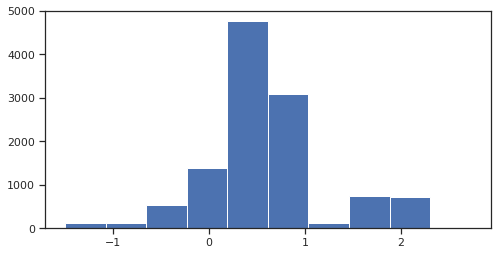

In [292]:
plt.hist(seqs_encoding)

In [290]:
intervals # https://github.com/BenjaminDoran/unidip/blob/6a8ac2b2670788995f846110216902b5588d83dd/unidip/unidip.py

(0.09286122327803376, 0.000999000999000999, (2590, 6608))

(array([ 317., 3086.,    8.,    5.,  178.,  420.,  721.,  248.,   22.,
           4.]),
 array([0.40288112, 0.63548464, 0.8680881 , 1.1006917 , 1.3332951 ,
        1.5658987 , 1.7985022 , 2.0311058 , 2.263709  , 2.4963126 ,
        2.7289162 ], dtype=float32),
 <BarContainer object of 10 artists>)

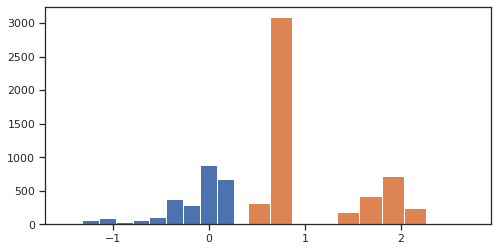

In [294]:
plt.hist(seqs_encoding[:2589])
plt.hist(seqs_encoding[6608:])

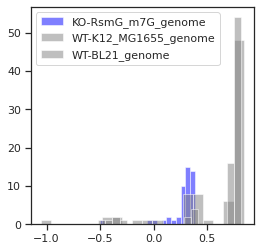

In [253]:
df_508 = df_psi[df_psi['Start'] == 520]
colours = ['blue', 'grey', 'grey']
for i, run in enumerate(['KO-RsmG_m7G_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome']): #set(df_psi['Run'].values):
    values = df_508[df_508['Run'] == run]
    plt.hist(values['MeanEncoding'].values, label=run, bins=20, alpha=0.5, color=colours[i])
plt.legend()
plt.savefig(f'/media/WorkingSpace/Ariane/output/bacteria/figs/m7527.svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

KO-RsmG_m7G_genome v.s. WT-BL21_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.789e-15 U_stat=0.000e+00
WT-BL21_genome v.s. WT-K12_MG1655_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.606e+03
KO-RsmG_m7G_genome v.s. WT-K12_MG1655_genome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.626e-14 U_stat=0.000e+00


<AxesSubplot:>

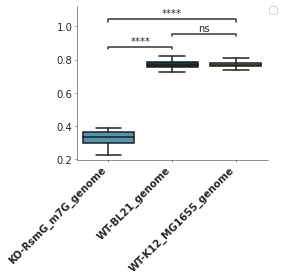

In [251]:
from sciviso import *
fig_dir = '../figs/'
opts = {'figsize': (4, 4),
        'palette': ['#429EBD', '#053F5C', '#F7AD19', '#F27F0C', '#9FE7F5', 
                     '#EB3E1B', '#86112E', '#E99E75', '#44426E',
                     '#BBAAB8', '#e25dc9', '#7f3f98', '#6D6875', "#30b5b5",
                     '#489984', '#42c652', "#cc008e", "#70a300"], 
        'title_font_size': 12, 'axis_font_size': 10, 
        'label_font_size': 10, 's': 60, 'bins': 20, 'colour':'#053F5C', 
       'opacity': 0.7}

df_508 = df_508[df_508['Run'].isin(['KO-RsmG_m7G_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome'])]
df_508 = df_508[df_508['kmer'].isin(df_508['kmer'].value_counts()[:3].index)]
bp = Boxplot(df_508, x='Run', y='MeanEncoding', config=opts, 
             add_stats=True)
bp.plot()

In [214]:
print(df_508[df_508['MeanEncoding'] < 0.5]['kmer'].value_counts()[:3])
print(df_508[df_508['MeanEncoding'] < 0.3]['kmer'].value_counts()[:3])
print(df_508[df_508['MeanEncoding'] > 0.5]['kmer'].value_counts()[:3])


CCGCG    33
CC-CG    29
CCCAG    19
Name: kmer, dtype: int64
CCCAG    19
CCGCG     9
CCGAG     3
Name: kmer, dtype: int64
CCCCG    137
CCCCA    112
CCCC-      5
Name: kmer, dtype: int64


In [ ]:
df_rmtb = get_kmer_encodings('CCGTC',  f'{output_folder}kmer_5_bac.h5', training_runs, 1000)

In [306]:
comparisons = [['WT-BL21_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'KO-pseudouridine_genome'],
               ['WT-K12_MG1655_genome', 'WT-BL21_genome'],
               ['WT-BL21_genome', 'KO-RmtB_m7G_genome'],
               ['WT-BL21_genome', 'KO-RsmG_m7G_genome']
              ]

p_values = []
t_values = []
labels = []
kmer = []
df_psi = df_rmtb.copy()
    
df_psi.fillna(0, inplace=True)

# encode the data
psi_data = df_psi.values[:, 5:]
psi_data = psi_data / np.max(psi_data)
psi_data = np.array(psi_data).astype(float)
psi_data = np.array([d.reshape((4, kmer_len, 1)) for d in psi_data])
seqs_encoding = cvae.encode_new_data(psi_data, scale=False)
df_psi['MeanEncoding'] = seqs_encoding

for kmer_start in set(df_rmtb['ID'].values):
    df_psi_kmer = df_psi[df_psi['Start'] == kmer_start]
    if len(df_psi_kmer) > 10:
        for comparison in comparisons:
            e_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[0]]['MeanEncoding'].values
            s_plus = df_psi_kmer[df_psi_kmer['Run'] == comparison[1]]['MeanEncoding'].values
            t_stat, p_val = stats.ttest_ind(e_plus, s_plus)
            p_values.append(p_val)
            t_values.append(t_stat)
            kmer.append(kmer_start)
            labels.append(f'{comparison[1]} vs {comparison[0]}')
            
# Calculate adjusted p-values
from statsmodels.stats.multitest import multipletests
p_adj = multipletests(p_values, alpha=0.1, method='fdr_bh', returnsorted=False)

kmer_df = pd.DataFrame()
kmer_df['p_values'] = p_adj[1]
kmer_df['p.adj'] = p_values
kmer_df['t_values'] = t_values
kmer_df['labels'] = labels
kmer_df['kmer'] = kmer

# Have a look at if they are occuring in a specific place!
kmer_df[kmer_df['p.adj'] < 0.05]


362/362 [==============================] - 0s 1ms/step


,p_values,p.adj,t_values,labels,kmer
4,0.173292,0.020795,-2.338948,KO-RsmG_m7G_genome vs WT-BL21_genome,1422
13,0.004132,0.000331,3.611597,KO-RmtB_m7G_genome vs WT-BL21_genome,1394
17,0.217231,0.043446,-2.023832,WT-BL21_genome vs WT-K12_MG1655_genome,1396
18,0.000039,0.000002,4.851036,KO-RmtB_m7G_genome vs WT-BL21_genome,1396
23,0.214960,0.034394,2.132293,KO-RmtB_m7G_genome vs WT-BL21_genome,1398


In [307]:
from unidip.dip import diptst


seqs_encoding = list(seqs_encoding[:, 0])
seqs_encoding.sort()
intervals = diptst(seqs_encoding)
intervals

(0.10745773750640453, 0.000999000999000999, (5918, 9697))

(array([  18., 1339., 3669.,  545., 4158.,  859.,   51.,  451.,  443.,
          36.]),
 array([-2.4812841 , -1.9768245 , -1.472365  , -0.9679054 , -0.46344584,
         0.04101372,  0.5454733 ,  1.0499328 ,  1.5543925 ,  2.058852  ,
         2.5633116 ], dtype=float32),
 <BarContainer object of 10 artists>)

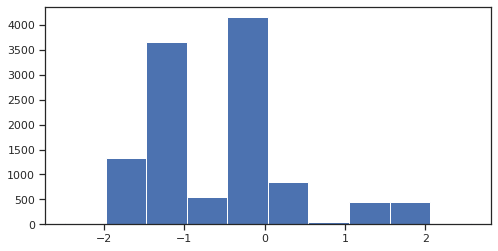

In [308]:
plt.hist(seqs_encoding)

In [310]:
UniDip(seqs_encoding, alpha=0.001, ntrials=100, mrg_dst=1).run()

/opt/miniconda/miniconda3/envs/ariane_bac/lib/python3.10/site-packages/unidip/dip.py:27: RuntimeWarning: divide by zero encountered in divide
  slopes = (work_cdf[1:] - work_cdf[0]) / distances


[(377, 5033),
 (5054, 5284),
 (5286, 5915),
 (5917, 6254),
 (6257, 7340),
 (7588, 7830),
 (7877, 8038),
 (8041, 9712),
 (9750, 9816),
 (9818, 10582),
 (10666, 11524)]

In [311]:
UniDip(seqs_encoding, alpha=0.001, ntrials=100, mrg_dst=1).run()

[(0, 11568)]

(array([ 58., 510., 346.,  28., 102., 297., 309., 183.,  39.,   4.]),
 array([-0.06949518,  0.19383714,  0.45716944,  0.7205018 ,  0.9838341 ,
         1.2471664 ,  1.5104988 ,  1.773831  ,  2.0371633 ,  2.3004956 ,
         2.563828  ], dtype=float32),
 <BarContainer object of 10 artists>)

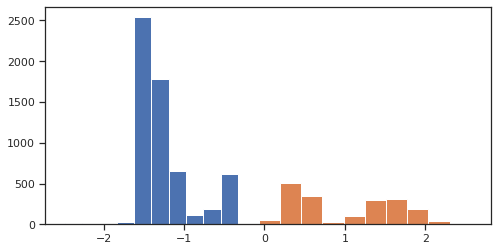

In [299]:
plt.hist(seqs_encoding[: 5934])
plt.hist(seqs_encoding[9693:])


In [258]:
df_508 = df_psi[df_psi['Start'] == 1396]


<AxesSubplot:>

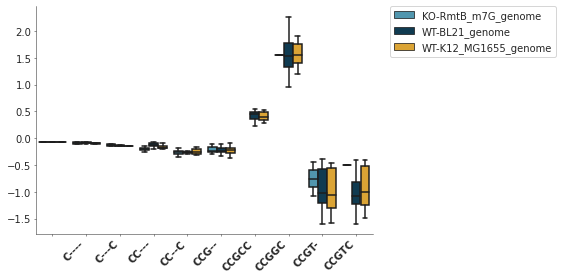

In [259]:
from sciviso import *
fig_dir = '../figs/'
opts = {'figsize': (8, 4),
        'palette': ['#429EBD', '#053F5C', '#F7AD19', '#F27F0C', '#9FE7F5', 
                     '#EB3E1B', '#86112E', '#E99E75', '#44426E',
                     '#BBAAB8', '#e25dc9', '#7f3f98', '#6D6875', "#30b5b5",
                     '#489984', '#42c652', "#cc008e", "#70a300"], 
        'title_font_size': 12, 'axis_font_size': 10, 
        'label_font_size': 10, 's': 60, 'bins': 20, 'colour':'#053F5C', 
       'opacity': 0.7}

df_508 = df_508[df_508['Run'].isin(['KO-RmtB_m7G_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome'])]
df_508 = df_508[df_508['kmer'].isin(df_508['kmer'].value_counts()[:10].index)]
bp = Boxplot(df_508, x='kmer', y='MeanEncoding', hue='Run', config=opts, 
             add_stats=False)
bp.plot()

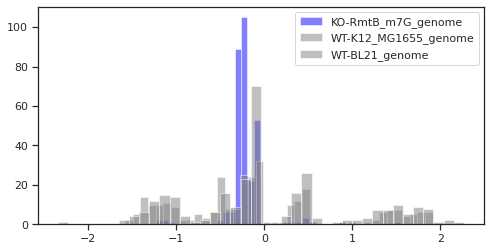

In [260]:
df_508 = df_psi[df_psi['Start'] == 1396]
colours = ['blue', 'grey', 'grey']
for i, run in enumerate(['KO-RmtB_m7G_genome', 'WT-K12_MG1655_genome', 'WT-BL21_genome']): #set(df_psi['Run'].values):
    values = df_508[df_508['Run'] == run]
    plt.hist(values['MeanEncoding'].values, label=run, bins=40, alpha=0.5, color=colours[i])
plt.legend()
plt.savefig(f'/media/WorkingSpace/Ariane/output/bacteria/figs/m7G1405.svg')

In [262]:
gr1 = df_508[df_508['MeanEncoding'] > -1]
gr1[gr1['MeanEncoding'] < 0]['kmer'].value_counts()

CC--C    177
         146
CCG--    101
CCGTC     82
CC---     73
CCGT-     43
CCG-C     31
C----     31
C---C     21
----C     15
CC         7
CCGCC      5
CCG        5
CCATC      4
CCCAC      3
---T-      3
CCGAC      3
CCGTT      2
CTG-C      2
CAG--      2
---TC      2
-CG--      2
ACCAC      1
CTG--      1
GC---      1
CCTT-      1
GCG-C      1
CC-TC      1
CC-AC      1
-CGT-      1
C--TT      1
C--TC      1
CTGT-      1
CGTTC      1
-CGAC      1
CCAAT      1
CCGTA      1
CCAT-      1
--GT-      1
C--T-      1
-CG-C      1
Name: kmer, dtype: int64

In [261]:
print(df_508[df_508['MeanEncoding'] < -1]['kmer'].value_counts()[:3])

gr1 = df_508[df_508['MeanEncoding'] > -1]
gr1 = print(gr1[gr1['MeanEncoding'] < 0]['kmer'].value_counts()[:3])

gr1 = df_508[df_508['MeanEncoding'] > 0]
gr1 = print(gr1[gr1['MeanEncoding'] < 1.0]['kmer'].value_counts()[:3])

gr1 = df_508[df_508['MeanEncoding'] > 1]
gr1 = print(gr1[gr1['MeanEncoding'] < 3.0]['kmer'].value_counts()[:3])


CCGTC    111
CCGT-     55
CCGTT      7
Name: kmer, dtype: int64
CC--C    177
         146
CCG--    101
Name: kmer, dtype: int64
CCGCC    152
CCGGC     12
CGGCC      8
Name: kmer, dtype: int64
CCGGC    175
CCAGC      2
-CGGC      1
Name: kmer, dtype: int64
